#### Advanced Transformations:

In this document I will:

- One-Hot encode all powers from the Powers column
- Split Hero|Publisher column into Hero and Publisher
- Split Measurements column into Height and Weight


In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

In [2]:
df_info = pd.read_csv('/Users/kass/Desktop/CodingDojo/04-DataEnrichment/Week14/superhero_info.csv')
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [4]:
df_power = pd.read_csv('/Users/kass/Desktop/CodingDojo/04-DataEnrichment/Week14/superhero_powers.csv')
df_power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [5]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


### Split the powers into seperate columns

In [6]:
## adding expand=True to see the data
df_power['Powers'].str.split(',',expand=True)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,Agility,Super Strength,Stamina,Super Speed,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,...,None,None,None,None,None,None,None,None,None,None
3,Lantern Power Ring,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Accelerated Healing,Intelligence,Super Strength,Stamina,Super Speed,Invulnerability,Animation,Super Breath,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Flight,Energy Blasts,Size Changing,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
663,Cold Resistance,Durability,Longevity,Super Strength,Cryokinesis,Immortality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
664,Agility,Stealth,Danger Sense,Marksmanship,Weapons Master,Longevity,Intelligence,Telepathy,Energy Blasts,Stamina,...,None,None,None,None,None,None,None,None,None,None
665,Cryokinesis,Telepathy,Magic,Fire Control,Probability Manipulation,Water Control,Terrakinesis,Weather Control,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
# add split columns into data frame
df_power['powers_split'] = df_power['Powers'].str.split(',')

In [8]:
## exploding the column of lists
exploded = df_power.explode('powers_split')

In [9]:
## saving the unique values from the exploded column
cols_to_make = exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [10]:
for col in cols_to_make:
    df_power[col] = df_power['Powers'].str.contains(col)
df_power.head()

/var/folders/n6/m7hlgmqs36l_cdkqm0vdj6qh0000gn/T/ipykernel_5262/2901467257.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_power[col] = df_power['Powers'].str.contains(col)
/var/folders/n6/m7hlgmqs36l_cdkqm0vdj6qh0000gn/T/ipykernel_5262/2901467257.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_power[col] = df_power['Powers'].str.contains(col)
/var/folders/n6/m7hlgmqs36l_cdkqm0vdj6qh0000gn/T/ipykernel_5262/2901467257.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Drop powers and powers_split columns
df_power = df_power.drop(columns = ['Powers', 'powers_split'])
#Verify the change
df_power.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Split hero|publisher column into two seperate colums 

In [12]:
#Split hero/publisher
df_info[['Hero', 'Publisher']] = df_info['Hero|Publisher'].str.split('|', expand = True)
# check to see if the code worked
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [13]:
#Drop old columns columns
df_info = df_info.drop(columns = ['Hero|Publisher'])
#Verify the change
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


### Split measuremtns column into two continaing 1. height 2. weight 

In [14]:
#Replace sigle quotes with double quotes
df_info['Measurements'] = df_info['Measurements'].str.replace("'",'"')

#Apply json.loads to whole column to convert into python string
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)

#Verify changes
df_info['Measurements'].head(3)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
Name: Measurements, dtype: object

In [15]:
#Create values to be added to df
height_weight = df_info['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [16]:
#Split columns so only numeric values stay
height_weight[['Height (cm)', 'cm']] = height_weight['Height'].str.split(' ', expand = True)
height_weight[['Weight (kg)', 'kg']] = height_weight['Weight'].str.split(' ', expand = True)

#Verify changes
height_weight

,Height,Weight,Height (cm),cm,Weight (kg),kg
0,203.0 cm,441.0 kg,203.0,cm,441.0,kg
1,191.0 cm,65.0 kg,191.0,cm,65.0,kg
2,185.0 cm,90.0 kg,185.0,cm,90.0,kg
3,203.0 cm,441.0 kg,203.0,cm,441.0,kg
4,193.0 cm,122.0 kg,193.0,cm,122.0,kg
...,...,...,...,...,...,...
458,183.0 cm,83.0 kg,183.0,cm,83.0,kg
459,165.0 cm,52.0 kg,165.0,cm,52.0,kg
460,66.0 cm,17.0 kg,66.0,cm,17.0,kg
461,170.0 cm,57.0 kg,170.0,cm,57.0,kg


In [17]:
#Drop unecessary columns
height_weight = height_weight.drop(columns = ['Height', 'Weight', 'cm', 'kg'])

#Verify the changes
height_weight.head()

,Height (cm),Weight (kg)
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0


In [18]:
df_info = pd.concat((df_info, height_weight), axis = 1)
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0


In [19]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   Hero          463 non-null    object
 8   Publisher     463 non-null    object
 9   Height (cm)   463 non-null    object
 10  Weight (kg)   463 non-null    object
dtypes: object(11)
memory usage: 39.9+ KB


In [32]:
df_info['Height (cm)'] = df_info['Height (cm)'].astype(float)
df_info['Weight (kg)'] = df_info['Weight (kg)'].astype(float)

In [33]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       463 non-null    object 
 1   Race         463 non-null    object 
 2   Alignment    463 non-null    object 
 3   Hair color   463 non-null    object 
 4   Eye color    463 non-null    object 
 5   Skin color   463 non-null    object 
 6   Hero         463 non-null    object 
 7   Publisher    463 non-null    object 
 8   Height (cm)  463 non-null    float64
 9   Weight (kg)  463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [ ]:
#Drop old columns columns
df_info = df_info.drop(columns = ['Measurements'])

#Verify the change
df_info.head()

### Merge the two data sets

In [22]:
df = pd.merge(df_info, df_power, left_on = 'Hero', 
                  right_on = 'hero_names', how = 'inner')

df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


### Answer Final Questions
- Compare the average weight of super powers who have Super Speed to those who do not.
- What is the average height of heroes for each publisher?

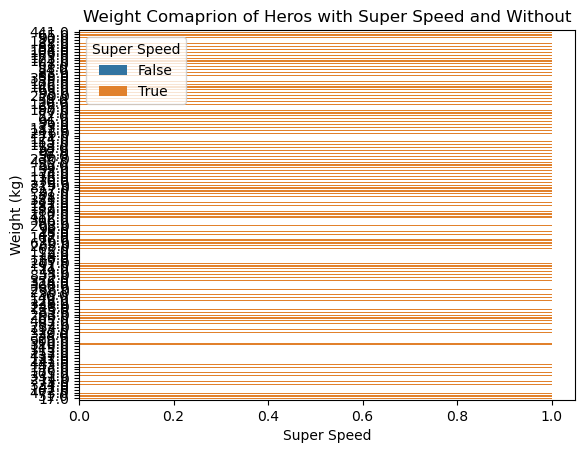

In [27]:
#Create bar plot of weight with those with super speed and those without
ax = sns.barplot(data = df, x = 'Super Speed', y = 'Weight (kg)', hue='Super Speed')
ax.set_title('Weight Comaprion of Heros with Super Speed and Without');

In [24]:
#Compare heights of heroes for each publisher
avg_height = df.groupby('Publisher')['Height (cm)'].mean()
avg_height

TypeError: Could not convert 185.0185.0180.0257.0183.0178.0185.0198.0178.0168.0183.0203.0170.0165.0168.0188.0178.0178.0173.0188.0191.0191.0165.0170.0185.0188.0183.0196.0198.0170.0170.0193.0193.0175.0175.0163.0170.0175.0183.0198.0267.0183.0185.0193.0188.0175.0244.0185.0168.0193.0188.0180.0183.0183.0157.062.5198.0178.0188.0188.0188.0170.0185.0175.0185.0180.0180.0170.0185.0196.0173.0244.0234.064.0180.0188.0165.0155.0191.0229.0201.0180.0175.0196.0185.0185.0183.0178.0183.0193.0178.0178.0157.0168.0185.0168.0168.0180.0180.0188.0193.0165.0178.0180.0183.0165.0185.0185.0178.0183.0165.0137.0168.0183.0173.0201.0175.0279.0188.0193.0165.0170.0201.0183.0170.0180.0165.0191.0188.0183.0168.0178.0175.0173.0165.0183.0170.0185.0 to numeric